In [347]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sys
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\CT")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\3DTomoGAN")
from plots import *
import os
import utils
import h5py
from scipy.optimize import curve_fit
from PIL import Image

import scipy.ndimage as nd

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patheffects as PathEffects

%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [348]:
root = r"C:\Users\Bruker\Documents\MAX4DCT"
choose_formatter(False)

In [349]:
x1, x2 = 218, 666
y1, y2 = 124, 388
z1, z2 = 124, 388

slice = [[x1, x2], [y1, y2], [z1, z2]]

names = [
    "hourglassV3_13_55_2bin",
]

crossections = {
    # "favg6":  {"name": names[0] },
    # "favg12": { "name": names[1]},
    # "favg24": {"name": names[2]},
}

identifiers = [
    "gt",
    "Rec_0_1_fdk",
    "Rec_0_1_fdk_enhanced_442256256_complete", #RSD: Simulated or complete dataset?
]
keys = [
    "gt",
    "13",
    "13_enhanced",
]

# for k, v in crossections.items():
for j,(id,key) in enumerate(zip(identifiers, keys)):

    if key.endswith("enhanced"):
        x1, x2 = 0,448
        y1, y2 = 0,264
        z1, z2 = 0,264
    else:
        x1, x2 = 218, 666
        y1, y2 = 124, 388
        z1, z2 = 124, 388

    load_name = f"{names[0]}_{identifiers[j]}_{x1}_{x2}_{y1}_{y2}_{z1}_{z2}.npy"
    load_path = os.path.join(root, load_name)
    crossections[key]= np.squeeze(np.load(load_path))

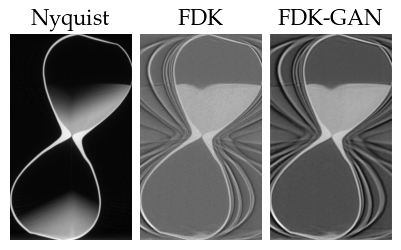

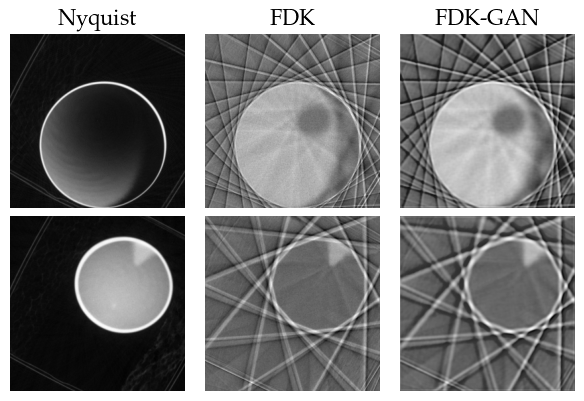

In [292]:
x1,x2, =0, 448
y1,y2 = 0, 264
z1,z2 = 158,159

upright_grid = []

hourglass_full = np.squeeze(crossections["gt"][x1:x2, y1:y2, z1:z2])
hourglass_fdk = np.squeeze(crossections["13"][x1:x2, y1:y2, z1:z2])
hourglass_fdk_gan = np.squeeze(crossections["13_enhanced"][x1:x2, y1:y2, z1:z2])

upright_grid.append(hourglass_full)
upright_grid.append(hourglass_fdk)
upright_grid.append(hourglass_fdk_gan)


grid_slices = []

x1,x2, = 112, 113
y1,y2 = 0,264
z1,z2 = 0,264

crossection_full = np.squeeze(crossections["gt"][x1:x2, y1:y2, z1:z2])
crossection_fdk = np.squeeze(crossections["13"][x1:x2, y1:y2, z1:z2])
crossection_fdk_gan = np.squeeze(crossections["13_enhanced"][x1:x2, y1:y2, z1:z2])

grid_slices.append(crossection_full)
grid_slices.append(crossection_fdk)
grid_slices.append(crossection_fdk_gan)


x1,x2, = 425, 426
y1,y2 = 0,264
z1,z2 = 0,264

bottom_full = np.squeeze(crossections["gt"][x1:x2, y1:y2, z1:z2])
bottom_fdk = np.squeeze(crossections["13"][x1:x2, y1:y2, z1:z2])
bottom_fdk_gan = np.squeeze(crossections["13_enhanced"][x1:x2, y1:y2, z1:z2])

grid_slices.append(bottom_full)
grid_slices.append(bottom_fdk)
grid_slices.append(bottom_fdk_gan)



plot_slice_grid([hourglass_full, hourglass_fdk, hourglass_fdk_gan], ["Nyquist", "FDK", "FDK-GAN", "Upper", "", "", "Lower", "", ""], 
                bar=False,
    folder ="Hourglass4D",
    suptitle=None,
    savefig=True,
    savefile="Hourglass4D_binned_13_overview",
    fs =(1,1))

plot_slice_grid(grid_slices, ["Nyquist", "FDK", "FDK-GAN", "", "", "", "", "", ""],
                bar=False,
    folder ="Hourglass4D",
    suptitle=None,
    savefig=False,
    savefile="Hourglass4D_binned_crossections",
    fs =(1,1.5))

In [350]:
def calc_gradient(crossection):
    grad = np.gradient(crossection)
    grad_x = grad[0]
    grad_y = grad[1]
    grad_z = grad[2]
    return np.sqrt(grad_x**2 + grad_y**2 + grad_z**2)

def calc_sobel(crossection):
    import scipy.ndimage as nd
    grad_x = nd.sobel(crossection, axis=0)
    grad_y = nd.sobel(crossection, axis=1)
    grad_z = nd.sobel(crossection, axis=2)
    return np.sqrt(grad_x**2 + grad_y**2 + grad_z**2)

def apply_laplace(crossection):
    return nd.laplace(crossection) #+ nd.laplace(crossection)

Input: 23599.54296875
Output: 19705.017578125
FDK
0.00037565394 0.86232245
FDK-GAN
0.00024620496 1.036152


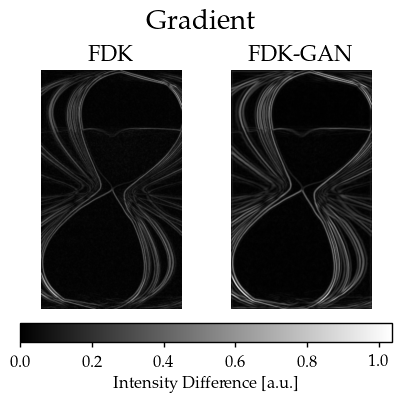

FDK
0.0005147259 0.81005144
FDK-GAN
0.001010336 0.9699923

0.0006470385 1.0110831

0.0007121857 1.3788205


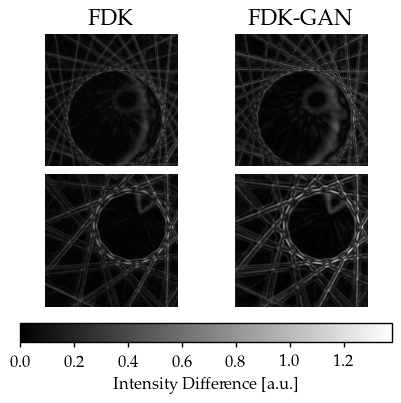

FDK
0.00037565394 0.35837495
FDK-GAN
0.0005287125 0.40458354


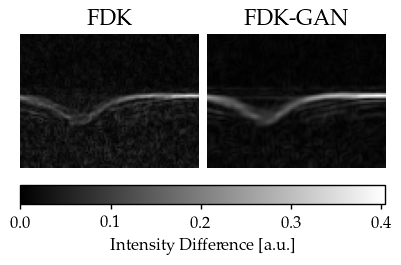

FDK
-0.027028624 0.029550087
FDK-GAN
-0.010682162 0.010799602


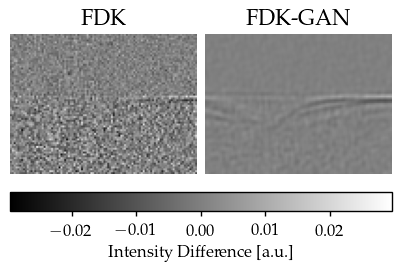

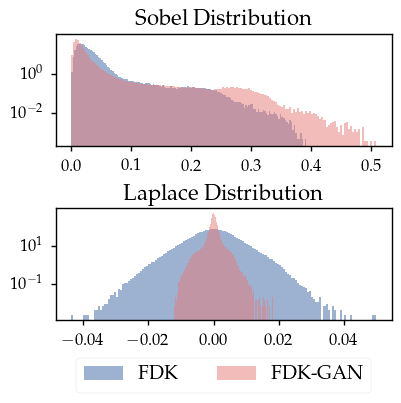

In [353]:
slice_norm = lambda x, ref : x* (np.max(ref) - np.min(ref)) + np.min(ref)
volin = np.squeeze(crossections["13"])
volin_gan = slice_norm(np.squeeze(crossections["13_enhanced"]), np.squeeze(crossections["13"]))


print(f"Input: {utils.TV_score(volin[75:150, 100:200, 100:200])}")
print(f"Output: {utils.TV_score(volin_gan[75:150, 100:200, 100:200])}")


volin_grad = calc_sobel(volin)
volin_grad_gan = calc_sobel(volin_gan)

volin_laplace = apply_laplace(volin)
volin_laplace_gan = apply_laplace(volin_gan)

x1,x2, =0, 448
y1,y2 = 0, 264
z1,z2 = 158,159

slin_grad = np.squeeze(volin_grad[x1:x2, y1:y2, z1:z2])
slgan_grad = np.squeeze(volin_grad_gan[x1:x2, y1:y2, z1:z2])

plot_slice_grid([slin_grad, slgan_grad], ["FDK", "FDK-GAN"],
                bar=False,
    folder ="Hourglass4D",
    suptitle="Gradient",
    savefig=False,
    savefile="Hourglass4D_binned_gradient",
        cm="gray",
    fs=(1,1))

grad_grid = []

x1,x2, = 112, 113
y1,y2 = 0,264
z1,z2 = 0,264

slin_grad = np.squeeze(volin_grad[x1:x2, y1:y2, z1:z2])
slgan_grad = np.squeeze(volin_grad_gan[x1:x2, y1:y2, z1:z2])

grad_grid.append(slin_grad)
grad_grid.append(slgan_grad)

x1,x2, = 425, 426
y1,y2 = 0,264
z1,z2 = 0,264

slin_grad = np.squeeze(volin_grad[x1:x2, y1:y2, z1:z2])
slgan_grad = np.squeeze(volin_grad_gan[x1:x2, y1:y2, z1:z2])

grad_grid.append(slin_grad)
grad_grid.append(slgan_grad)


plot_slice_grid(grad_grid, ["FDK", "FDK-GAN", "", ""],
                bar=False,
    folder ="Hourglass4D",
    suptitle=None,#"Gradient Crossections",
    savefig=False,
    savefile="Hourglass4D_binned_gradient_crossections",
        cm="gray",
        two_sided=False,
    fs=(1,1))

grad_grid = []

x1, x2 = 75, 150
y1,y2 = 100,200
z1,z2 = 158,159

slin_grad = np.squeeze(volin_grad[x1:x2, y1:y2, z1:z2])
slgan_grad = np.squeeze(volin_grad_gan[x1:x2, y1:y2, z1:z2])


grad_grid.append(slin_grad)
grad_grid.append(slgan_grad)






plot_slice_grid(grad_grid, ["FDK", "FDK-GAN", "Laplace", "Laplace"],
                bar=False,
    folder ="Hourglass4D",
    suptitle=None,
    savefig=False,
    savefile="Hourglass4D_binned_gradient_interface",
    cm="gray",
    two_sided=False,
    ns=(1,2),
    fs=(1,1))


laplace_grid = []

slin_laplace = np.squeeze(volin_laplace[x1:x2, y1:y2, z1:z2])
slgan_laplace = np.squeeze(volin_laplace_gan[x1:x2, y1:y2, z1:z2])

laplace_grid.append(slin_laplace)
laplace_grid.append(slgan_laplace)

plot_slice_grid(laplace_grid, ["FDK", "FDK-GAN"],
                bar=False,
    folder ="Hourglass4D",
    suptitle=None,
    savefig=False,
    savefile="Hourglass4D_binned_laplace_interface",
    cm="gray",
    two_sided=True,
    ns=(1,2),
    fs=(1,1))




plot_intensity_dist(
    [[np.squeeze(volin_grad[x1:x2, y1:y2, y1:y2]).flatten(), np.squeeze(volin_grad_gan[x1:x2, y1:y2, y1:y2]).flatten()],
    [np.squeeze(volin_laplace[x1:x2, y1:y2, y1:y2]).flatten(), np.squeeze(volin_laplace_gan[x1:x2, y1:y2, y1:y2]).flatten()]],
    [["FDK", "FDK-GAN"], ["FDK", "FDK-GAN"]],
    folder="Hourglass4D",
    savefile="Hourglass4D_binned_gradient_dist",
    savefig=False,
    suptitle=["Sobel Distribution", "Laplace Distribution"],
    ns=(2,1),
    fs=(1,1),
)




In [284]:
x1, x2 = 218, 666
y1, y2 = 124, 388
z1, z2 = 124, 388

slice = [[x1, x2], [y1, y2], [z1, z2]]

names = [
    "hourglassV3_13_55_2bin",
]

wedges = {}

identifiers = [
    "Wedge_Rec_0_fdk_0",
    "Wedge_Rec_0_fdk_1", #RSD: Simulated or complete dataset?
    "Wedge_Rec_0_fdk_0_enhanced_442256256",
    "Wedge_Rec_0_fdk_1_enhanced_442256256",
]
keys = [
    "0",
    "1",
    "0_enhanced",
    "1_enhanced",
]

# for k, v in crossections.items():
for j,(id,key) in enumerate(zip(identifiers, keys)):

    if key.endswith("enhanced"):
        x1, x2 = 0,448
        y1, y2 = 0,264
        z1, z2 = 0,264
    else:
        x1, x2 = 218, 666
        y1, y2 = 124, 388
        z1, z2 = 124, 388

    load_name = f"{names[0]}_{identifiers[j]}_{x1}_{x2}_{y1}_{y2}_{z1}_{z2}.npy"
    load_path = os.path.join(root, load_name)
    wedges[key]= np.squeeze(np.load(load_path))

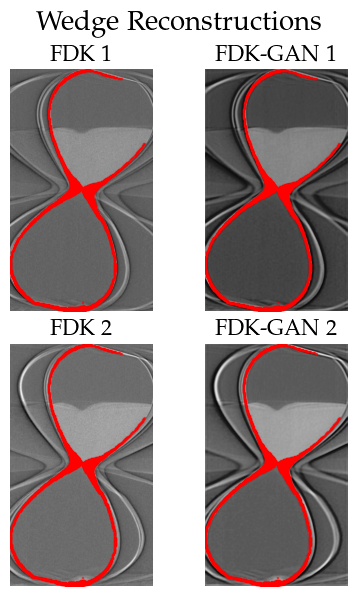

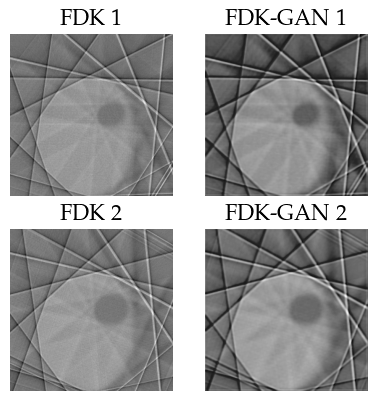

In [346]:
x1,x2, =0, 448
y1,y2 = 0, 264
z1,z2 = 158,159

upright_grid = []


half1_fdk = np.squeeze(wedges["0"][x1:x2, y1:y2, z1:z2])
half1_gan = np.squeeze(wedges["0_enhanced"][x1:x2, y1:y2, z1:z2])

half2_fdk = np.squeeze(wedges["1"][x1:x2, y1:y2, z1:z2])
half2_gan = np.squeeze(wedges["1_enhanced"][x1:x2, y1:y2, z1:z2])

upright_grid.append(half1_fdk)
upright_grid.append(half1_gan)
upright_grid.append(half2_fdk)
upright_grid.append(half2_gan)

gt_static = np.squeeze(crossections["gt"][x1:x2, y1:y2, z1:z2])
X, Y = np.meshgrid(np.arange(0, 448), np.arange(0, 264))
args = np.argwhere(gt_static > 0.0245)


grid_slices = []

x1,x2, = 112, 113
y1,y2 = 0,264
z1,z2 = 0,264

crossection_0fdk = np.squeeze(wedges["0"][x1:x2, y1:y2, z1:z2])
crossection_0gan = np.squeeze(wedges["0_enhanced"][x1:x2, y1:y2, z1:z2])
crossection_1fdk = np.squeeze(wedges["1"][x1:x2, y1:y2, z1:z2])
crossection_1gan = np.squeeze(wedges["1_enhanced"][x1:x2, y1:y2, z1:z2])

grid_slices.append(crossection_0fdk)
grid_slices.append(crossection_0gan)
grid_slices.append(crossection_1fdk)
grid_slices.append(crossection_1gan)


plot_slice_grid(upright_grid, ["FDK 1", "FDK-GAN 1", "FDK 2", "FDK-GAN 2", "", "Lower", "", ""], 
                bar=False,
    folder ="Hourglass4D",
    suptitle="Wedge Reconstructions",
    savefig=True,
    savefile="wedge_binned_overview",
    mask = args.T,
    fs =(1.5,1))

plot_slice_grid(grid_slices, ["FDK 1", "FDK-GAN 1", "FDK 2", "FDK-GAN 2", "", "Lower", "", ""],
                bar=False,
    folder ="Hourglass4D",
    suptitle=None,
    savefig=True,
    savefile="wedge_binned_crossection",
    fs =(1,1))

    

FDK 1
0.0015597976 0.36843845
FDK-GAN 1
0.0005252214 0.48340604
FDK 2
0.00063991366 0.343745
FDK-GAN 2
0.00020794477 0.45896047


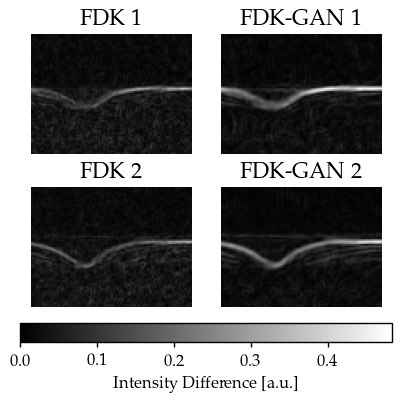

FDK
-0.18372017 0.18315227
FDK-GAN
-0.2562566 0.2247371


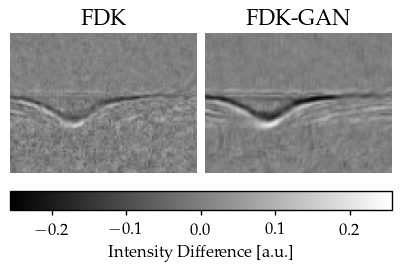

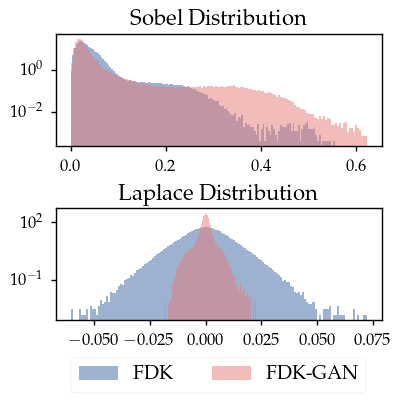

In [337]:
volin = np.squeeze(wedges["0"])
volin_gan = slice_norm(np.squeeze(wedges["0_enhanced"]), np.squeeze(wedges["0"]))

volin2 = np.squeeze(wedges["1"])
volin2_gan = slice_norm(np.squeeze(wedges["1_enhanced"]), np.squeeze(wedges["1"]))


volin_grad = calc_sobel(volin)
volin_grad_gan = calc_sobel(volin_gan)

volin2_grad = calc_sobel(volin2)
volin2_grad_gan = calc_sobel(volin2_gan)

volin_laplace = apply_laplace(volin)
volin_laplace_gan = apply_laplace(volin_gan)

volin2_laplace = apply_laplace(volin2)
volin2_laplace_gan = apply_laplace(volin2_gan)



grad_grid = []

x1, x2 = 75, 150
y1,y2 = 100,200
z1,z2 = 158,159

slin_grad = np.squeeze(volin_grad[x1:x2, y1:y2, z1:z2])
slgan_grad = np.squeeze(volin_grad_gan[x1:x2, y1:y2, z1:z2])
slin_grad2 = np.squeeze(volin2_grad[x1:x2, y1:y2, z1:z2])
slgan_grad2 = np.squeeze(volin2_grad_gan[x1:x2, y1:y2, z1:z2])


grad_grid.append(slin_grad)
grad_grid.append(slgan_grad)
grad_grid.append(slin_grad2)
grad_grid.append(slgan_grad2)



plot_slice_grid(grad_grid, ["FDK 1", "FDK-GAN 1", "FDK 2", "FDK-GAN 2"],
                bar=False,
    folder ="Hourglass4D",
    suptitle=None,
    savefig=True,
    savefile="wedge_binned_gradient_interface",
    cm="gray",
    two_sided=False,
    ns=(2,2),
    fs=(1,1))


laplace_grid = []

slin_laplace = np.squeeze(volin_laplace[x1:x2, y1:y2, z1:z2])
slgan_laplace = np.squeeze(volin_laplace_gan[x1:x2, y1:y2, z1:z2])

laplace_grid.append(slin_laplace)
laplace_grid.append(slgan_laplace)

plot_slice_grid([slin_grad2-slin_grad, slgan_grad2-slgan_grad], ["FDK", "FDK-GAN"],
                bar=False,
    folder ="Hourglass4D",
    suptitle=None,
    savefig=True,
    savefile="wedge_binned_difference_interface",
    cm="gray",
    two_sided=True,
    ns=(1,2),
    fs=(1,1))




plot_intensity_dist(
    [[np.squeeze(volin_grad[x1:x2, y1:y2, y1:y2]).flatten(), np.squeeze(volin_grad_gan[x1:x2, y1:y2, y1:y2]).flatten()],
    [np.squeeze(volin_laplace[x1:x2, y1:y2, y1:y2]).flatten(), np.squeeze(volin_laplace_gan[x1:x2, y1:y2, y1:y2]).flatten()]],
    [["FDK", "FDK-GAN"], ["FDK", "FDK-GAN"]],
    folder="Hourglass4D",
    savefile="wedge_binned_gradient_dist",
    savefig=False,
    suptitle=["Sobel Distribution", "Laplace Distribution"],
    ns=(2,1),
    fs=(1,1),
)

In [338]:
x1, x2 = 218, 666
y1, y2 = 124, 388
z1, z2 = 124, 388

slice = [[x1, x2], [y1, y2], [z1, z2]]

names = [
    "hourglassV3_13_55_2bin",
]

endsections = {
    # "favg6":  {"name": names[0] },
    # "favg12": { "name": names[1]},
    # "favg24": {"name": names[2]},
}

identifiers = [
    "gt",
    "Rec_54_1_fdk",
    "Rec_54_1_fdk_enhanced_442256256_complete", #RSD: Simulated or complete dataset?
]
keys = [
    "gt",
    "13",
    "13_enhanced",
]

# for k, v in crossections.items():
for j,(id,key) in enumerate(zip(identifiers, keys)):

    if key.endswith("enhanced"):
        x1, x2 = 0,448
        y1, y2 = 0,264
        z1, z2 = 0,264
    else:
        x1, x2 = 218, 666
        y1, y2 = 124, 388
        z1, z2 = 124, 388

    load_name = f"{names[0]}_{identifiers[j]}_{x1}_{x2}_{y1}_{y2}_{z1}_{z2}.npy"
    load_path = os.path.join(root, load_name)
    endsections[key]= np.squeeze(np.load(load_path))

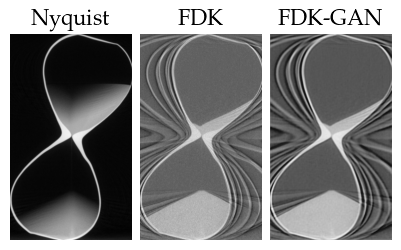

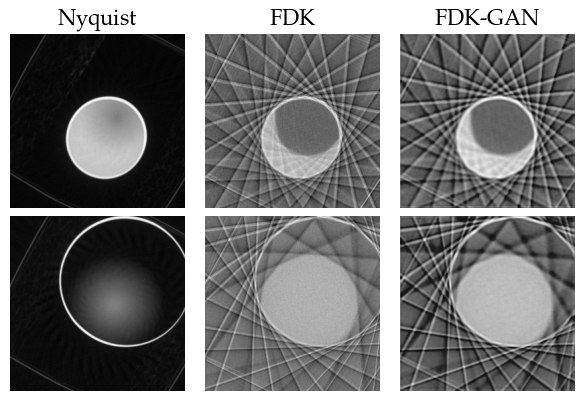

In [342]:
x1,x2, =0, 448
y1,y2 = 0, 264
z1,z2 = 158,159

grid_slices = []

hourglass_full = np.squeeze(endsections["gt"][x1:x2, y1:y2, z1:z2])
hourglass_fdk = np.squeeze(endsections["13"][x1:x2, y1:y2, z1:z2])
hourglass_fdk_gan = np.squeeze(endsections["13_enhanced"][x1:x2, y1:y2, z1:z2])

# grid_slices.append(hourglass_full)
# grid_slices.append(hourglass_fdk)
# grid_slices.append(hourglass_fdk_gan)

x1,x2, = 175, 176
y1,y2 = 0,264
z1,z2 = 0,264

crossection_full = np.squeeze(endsections["gt"][x1:x2, y1:y2, z1:z2])
crossection_fdk = np.squeeze(endsections["13"][x1:x2, y1:y2, z1:z2])
crossection_fdk_gan = np.squeeze(endsections["13_enhanced"][x1:x2, y1:y2, z1:z2])

grid_slices.append(crossection_full)
grid_slices.append(crossection_fdk)
grid_slices.append(crossection_fdk_gan)


x1,x2, = 375, 376
y1,y2 = 0,264
z1,z2 = 0,264

bottom_full = np.squeeze(endsections["gt"][x1:x2, y1:y2, z1:z2])
bottom_fdk = np.squeeze(endsections["13"][x1:x2, y1:y2, z1:z2])
bottom_fdk_gan = np.squeeze(endsections["13_enhanced"][x1:x2, y1:y2, z1:z2])

grid_slices.append(bottom_full)
grid_slices.append(bottom_fdk)
grid_slices.append(bottom_fdk_gan)



plot_slice_grid([hourglass_full, hourglass_fdk, hourglass_fdk_gan], ["Nyquist", "FDK", "FDK-GAN", "Upper", "", "", "Lower", "", ""], 
                bar=False,
    folder ="Hourglass4D",
    suptitle=None,
    savefig=True,
    savefile="Hourglass4D_binned_lastrev",
    fs =(1,1))

plot_slice_grid(grid_slices, ["Nyquist", "FDK", "FDK-GAN", "", "", "", "", "", ""],
                bar=False,
    folder ="Hourglass4D",
    suptitle=None,
    savefig=True,
    savefile="Hourglass4D_binned_endsections",
    fs =(1,1.5))
